In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
#Number = total number of bones affected by kyphosis
#Start  = from which bone Kyphosis started

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


<Axes: xlabel='Kyphosis', ylabel='count'>

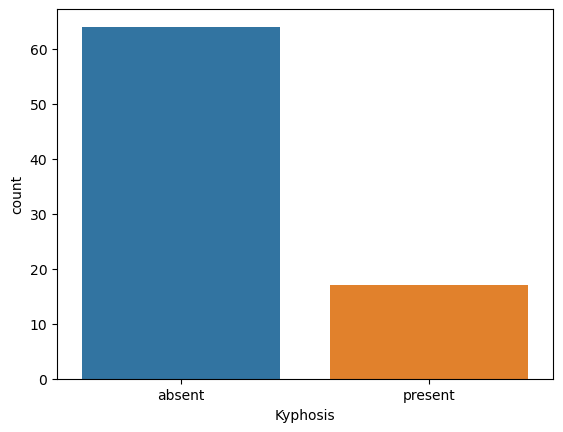

In [6]:
sns.countplot(x='Kyphosis', data = df)

/home/kuki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


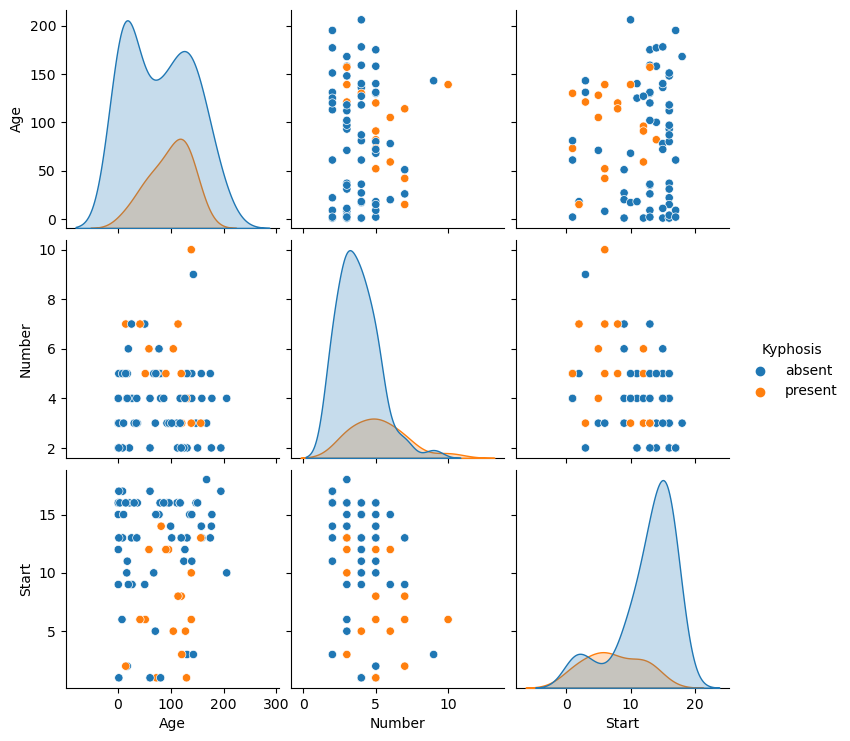

In [7]:
sns.pairplot(df, hue = 'Kyphosis')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df.drop("Kyphosis", axis = 1)
y = df['Kyphosis']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 101)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
# dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15,min_samples_split = 10, min_samples_leaf = 5) #gini = speed,,,, entropy = accuracy

In [13]:
dtree = DecisionTreeClassifier(criterion = 'entropy')
#gini for speed 
#entropy for accuracy

In [14]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
#prediction and evaluation

In [16]:
predictions = dtree.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test, predictions))

[[16  1]
 [ 3  5]]


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.84      0.94      0.89        17
     present       0.83      0.62      0.71         8

    accuracy                           0.84        25
   macro avg       0.84      0.78      0.80        25
weighted avg       0.84      0.84      0.83        25



In [19]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [20]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = features, filled = True)

In [21]:
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph[0].create_png())

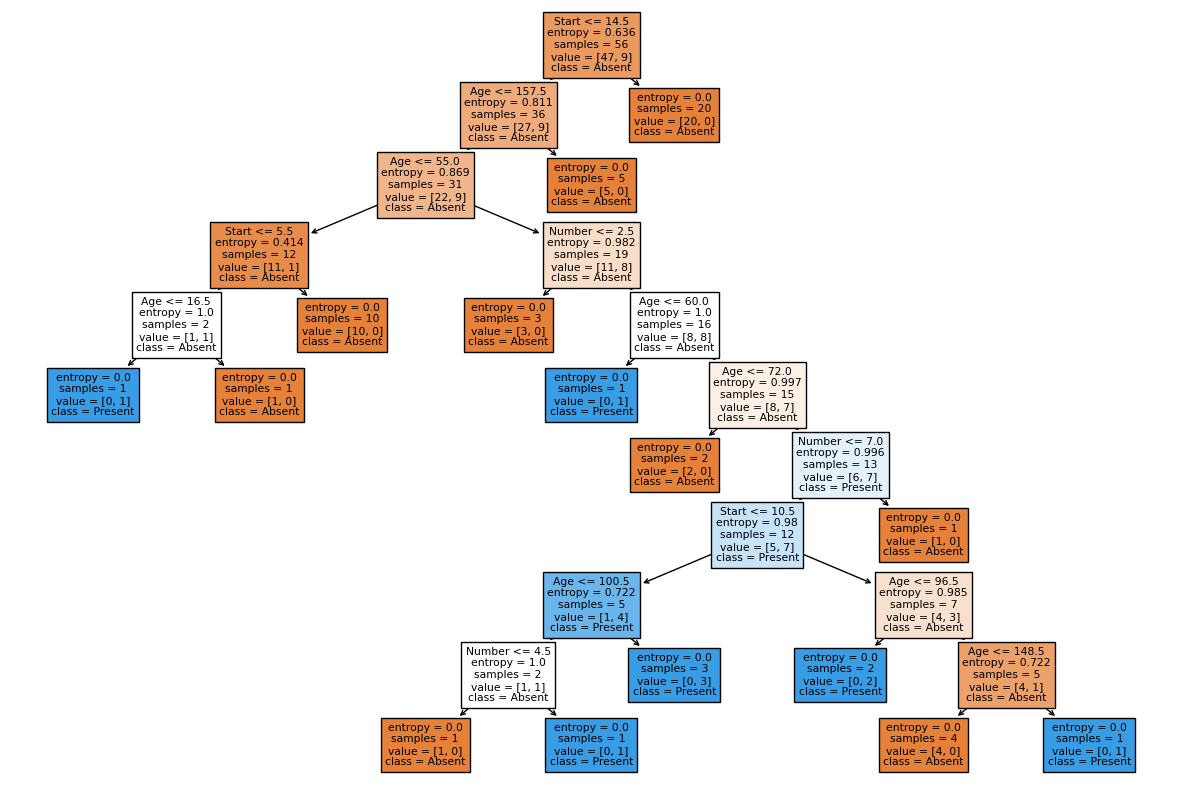

In [22]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled=True, feature_names=list(x.columns), class_names=['Absent', 'Present'])
plt.show()


In [23]:
#Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=100, criterion = 'entropy') #n_estimators number of descision tree we need 

In [29]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [30]:
rfc_pred = rfc.predict(x_test)

In [31]:
print(confusion_matrix(y_test, rfc_pred))

[[17  0]
 [ 6  2]]


In [33]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

